In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
import warnings

In [2]:
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (8,6)

In [46]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
if 'ID' in df.columns:
    df = df.rename(columns={'ID': 'ID'})



In [8]:
possible_target_names = [
    'default payment next month',
    'default.payment.next.month',
]
target_col = None
for name in possible_target_names:
    if name in df.columns:
        target_col = name
        break

In [9]:
X = df.drop(columns=[target_col, 'ID']) if 'ID' in df.columns else df.drop(columns=[target_col])
y = df[target_col].astype(int)
print("Features:", X.shape, "Target distribution:\n", y.value_counts())

Features: (30000, 23) Target distribution:
 default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [10]:
print("Missing values per column:\n", X.isna().sum())

Missing values per column:
 LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


In [11]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_cols), numeric_cols[:20]

(23,
 ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3'])

In [12]:
X.duplicated().sum()

56

In [13]:
y.duplicated().sum()

29998

In [15]:
X.drop_duplicates(inplace=True)

In [16]:
X.duplicated().sum()

0

In [17]:
X.shape

(29944, 23)

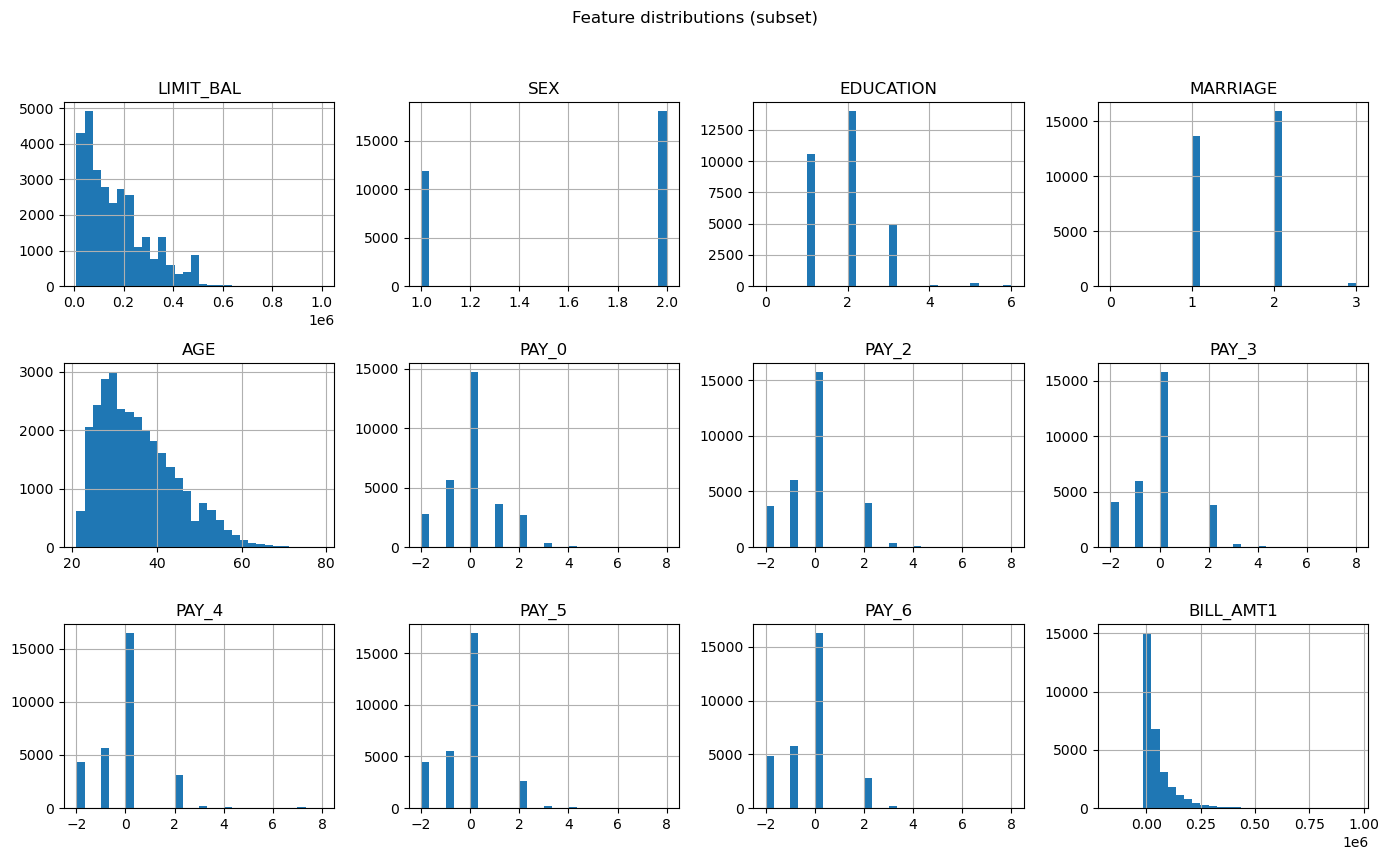

In [18]:
subset = numeric_cols[:12]
X[subset].hist(bins=30, layout=(3,4), figsize=(14,9))
plt.suptitle("Feature distributions (subset)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

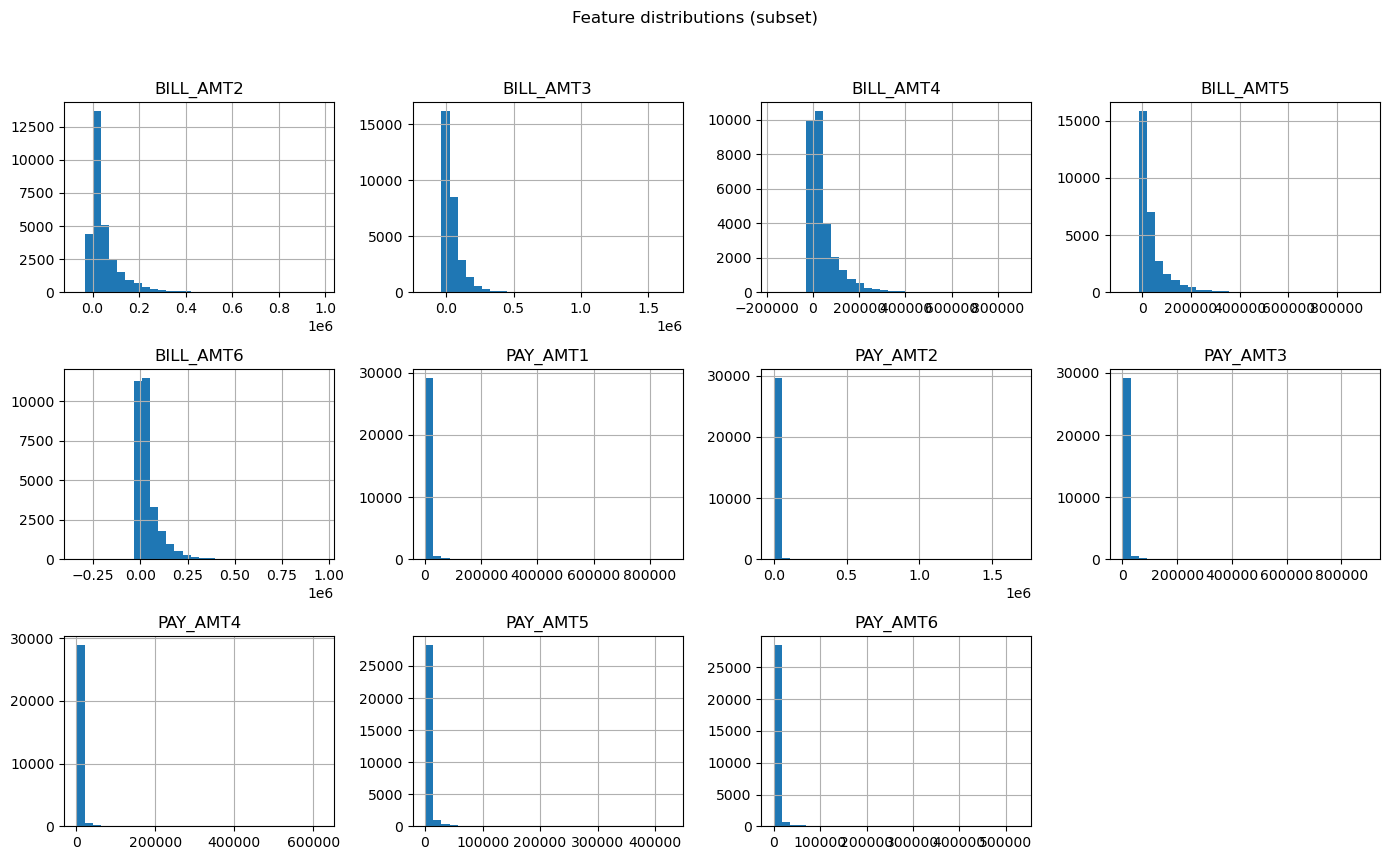

In [19]:
subset = numeric_cols[12:]
X[subset].hist(bins=30, layout=(3,4), figsize=(14,9))
plt.suptitle("Feature distributions (subset)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

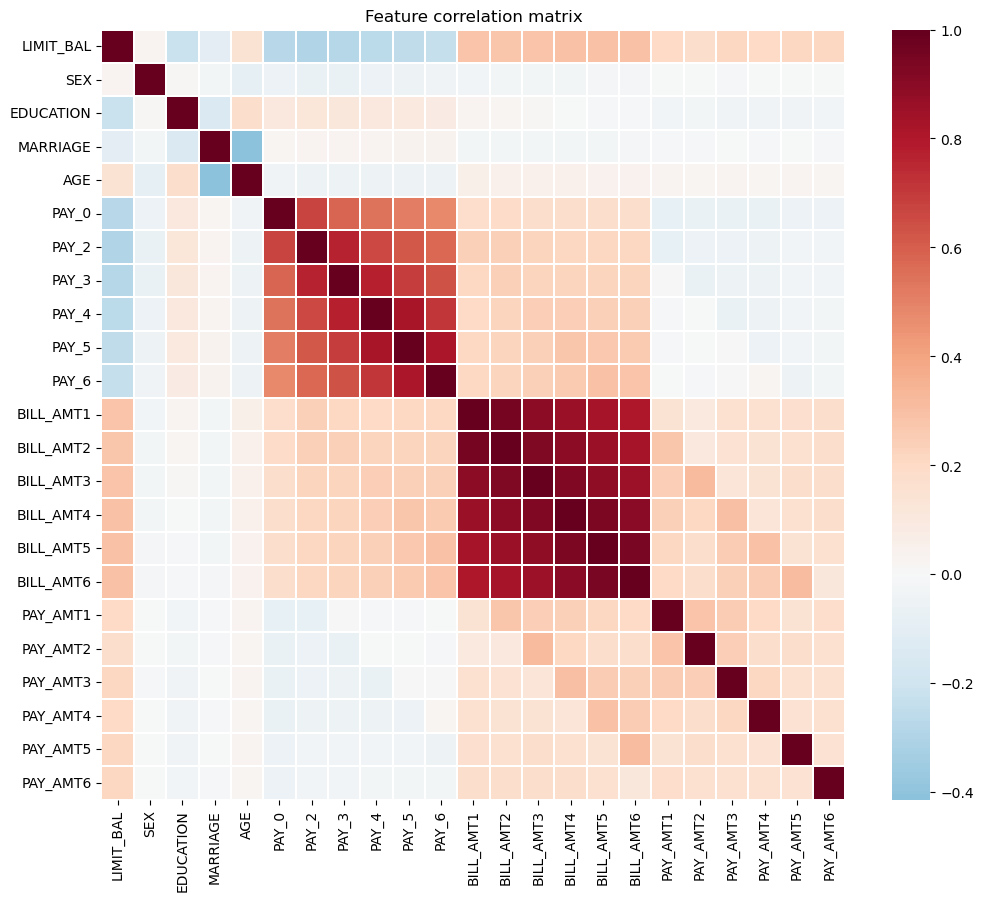

In [20]:
corr = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='RdBu_r', center=0, linewidths=0.2)
plt.title("Feature correlation matrix")
plt.show()

Text(0.5, 1.02, 'Pairplot for selected features')

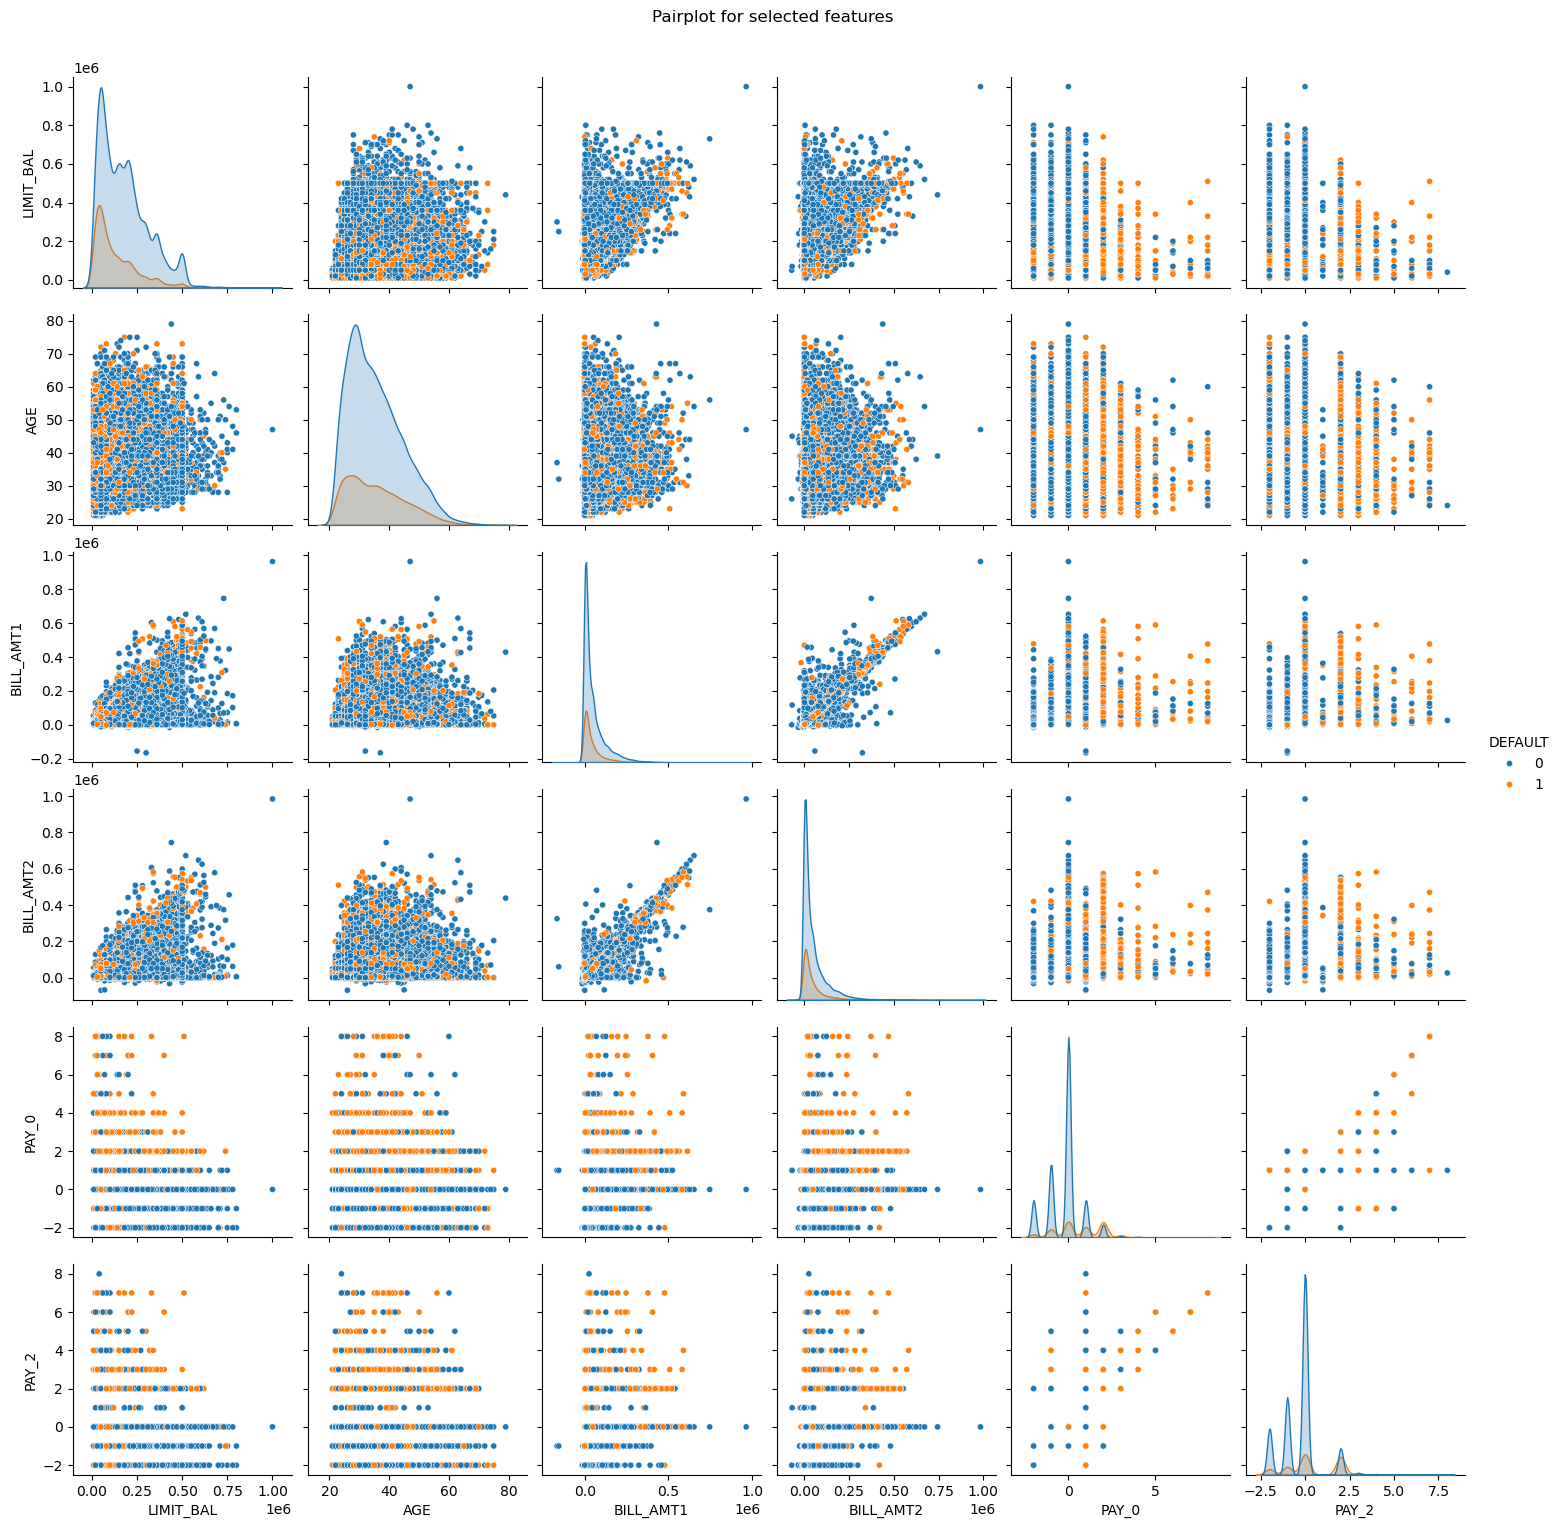

In [21]:
subset2 = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_0', 'PAY_2']  
subset2 = [c for c in subset2 if c in X.columns]
sns.pairplot(pd.concat([X[subset2], y.rename('DEFAULT')], axis=1), hue='DEFAULT', diag_kind='kde', plot_kws={'s':20})
plt.suptitle("Pairplot for selected features", y=1.02)

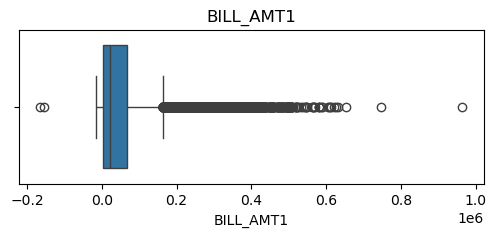

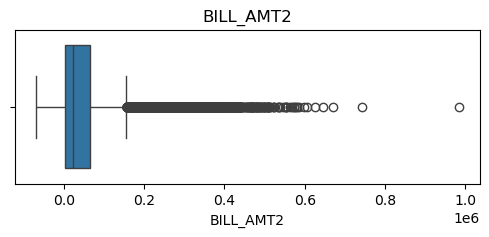

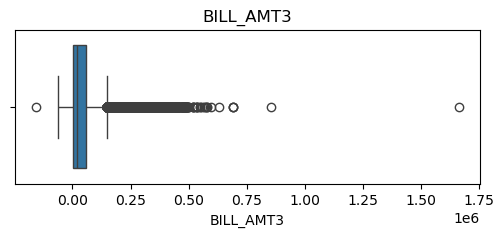

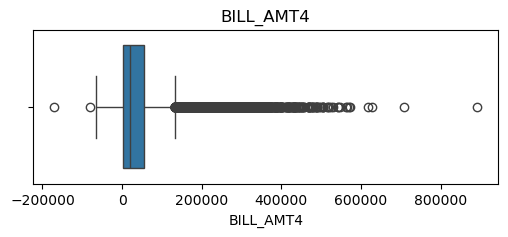

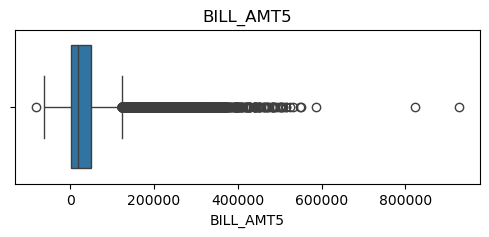

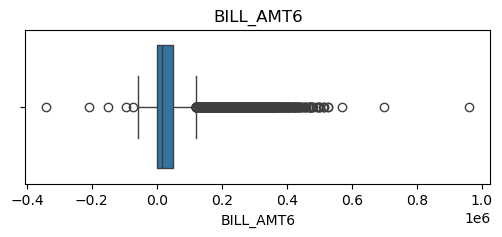

In [22]:
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    if col in X.columns:
        plt.figure(figsize=(6,2))
        sns.boxplot(x=X[col])
        plt.title(col)
        plt.show()

In [23]:
X.skew()

LIMIT_BAL     0.994144
SEX          -0.424156
EDUCATION     0.970717
MARRIAGE     -0.018685
AGE           0.732142
PAY_0         0.736452
PAY_2         0.793264
PAY_3         0.841950
PAY_4         1.001539
PAY_5         1.010001
PAY_6         0.948906
BILL_AMT1     2.661707
BILL_AMT2     2.703049
BILL_AMT3     3.085695
BILL_AMT4     2.819695
BILL_AMT5     2.874055
BILL_AMT6     2.844235
PAY_AMT1     14.657570
PAY_AMT2     30.429534
PAY_AMT3     17.203136
PAY_AMT4     12.894648
PAY_AMT5     11.118361
PAY_AMT6     10.631731
dtype: float64

In [24]:
skew_values = X.skew().sort_values(ascending=False)


skewed_cols = skew_values[abs(skew_values) > 0.75].index

pt = PowerTransformer(method='yeo-johnson', standardize=False)
X[skewed_cols] = pt.fit_transform(X[skewed_cols])

In [25]:
X.skew()

LIMIT_BAL   -0.075264
SEX         -0.424156
EDUCATION    0.020574
MARRIAGE    -0.018685
AGE          0.732142
PAY_0        0.736452
PAY_2       -0.014296
PAY_3       -0.001423
PAY_4        0.011888
PAY_5        0.023231
PAY_6        0.030999
BILL_AMT1   -2.405728
BILL_AMT2   -1.281619
BILL_AMT3   -3.189980
BILL_AMT4   -2.781907
BILL_AMT5   -1.297717
BILL_AMT6   -2.989125
PAY_AMT1    -0.129850
PAY_AMT2    -0.109785
PAY_AMT3    -0.149743
PAY_AMT4    -0.164117
PAY_AMT5    -0.177496
PAY_AMT6    -0.173888
dtype: float64

In [26]:
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

In [27]:
X_clean = X_clean.reset_index(drop=True)
y_clean = y_clean.reset_index(drop=True)

print(X_clean.shape, y_clean.shape)

(29944, 23) (29944,)


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
print("Scaled shape:", X_scaled.shape)

Scaled shape: (29944, 23)


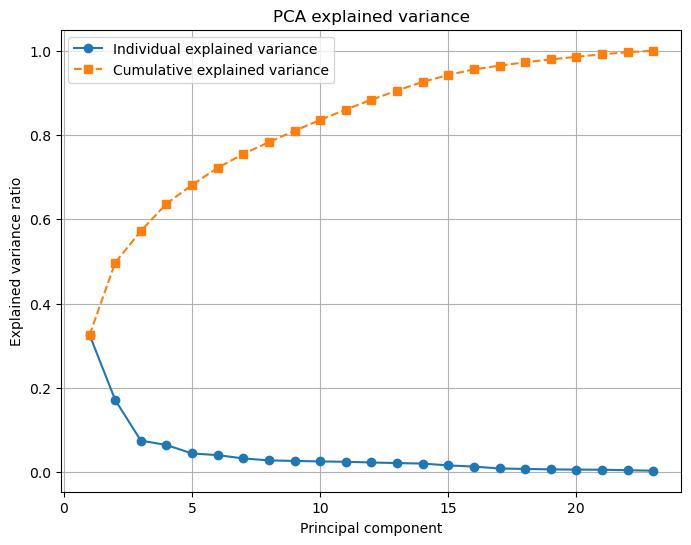

In [29]:
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)


explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, 'o-', label='Individual explained variance')
plt.plot(np.arange(1, len(explained)+1), cum_explained, 's--', label='Cumulative explained variance')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.title('PCA explained variance')
plt.grid(True)
plt.show()


X_pca_2 = X_pca_full[:, :2]

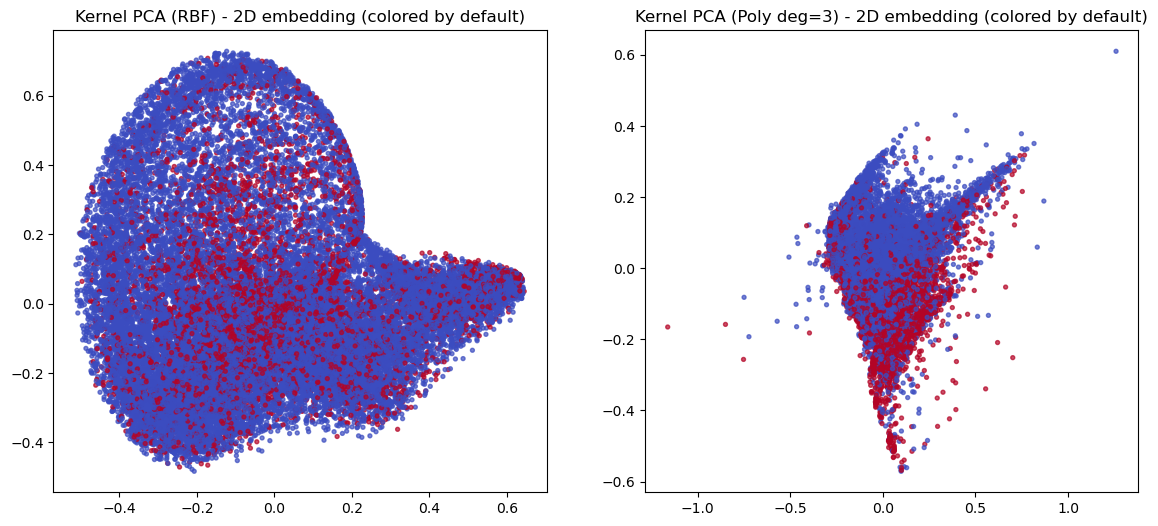

In [30]:
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.05, fit_inverse_transform=False, random_state=42)
X_kpca_rbf = kpca_rbf.fit_transform(X_scaled)

kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3, coef0=1, gamma=1e-3, random_state=42)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)


fig, axes = plt.subplots(1,2, figsize=(14,6))
axes[0].scatter(X_kpca_rbf[:,0], X_kpca_rbf[:,1], c=y_clean, s=8, cmap='coolwarm', alpha=0.7)
axes[0].set_title('Kernel PCA (RBF) - 2D embedding (colored by default)')
axes[1].scatter(X_kpca_poly[:,0], X_kpca_poly[:,1], c=y_clean, s=8, cmap='coolwarm', alpha=0.7)
axes[1].set_title('Kernel PCA (Poly deg=3) - 2D embedding (colored by default)')
plt.show()

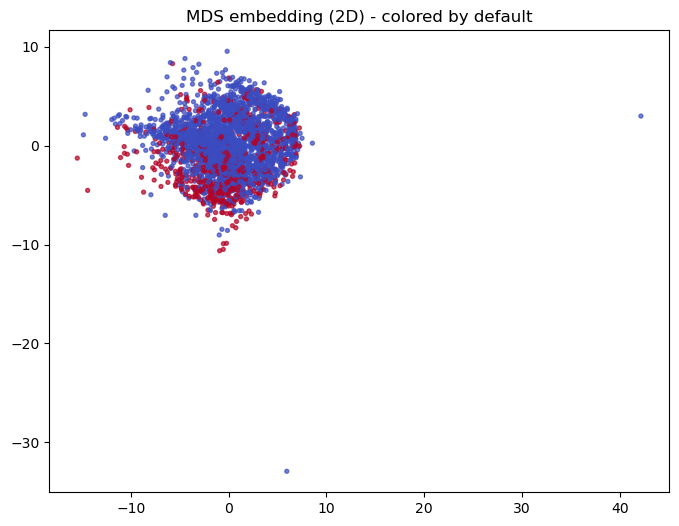

In [31]:
sample_for_mds = True
sample_size = 3000  
if sample_for_mds and X_scaled.shape[0] > sample_size:
    idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_for_mds = X_scaled[idx]
    y_for_mds = y_clean.iloc[idx]
else:
    X_for_mds = X_scaled
    y_for_mds = y_clean

from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42, n_init=4, max_iter=300)
X_mds = mds.fit_transform(X_for_mds)

import matplotlib.pyplot as plt
plt.scatter(X_mds[:,0], X_mds[:,1], c=y_for_mds, s=8, cmap='coolwarm', alpha=0.7)
plt.title("MDS embedding (2D) - colored by default")
plt.show()

  File "C:\Users\uched\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\uched\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\uched\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\uched\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


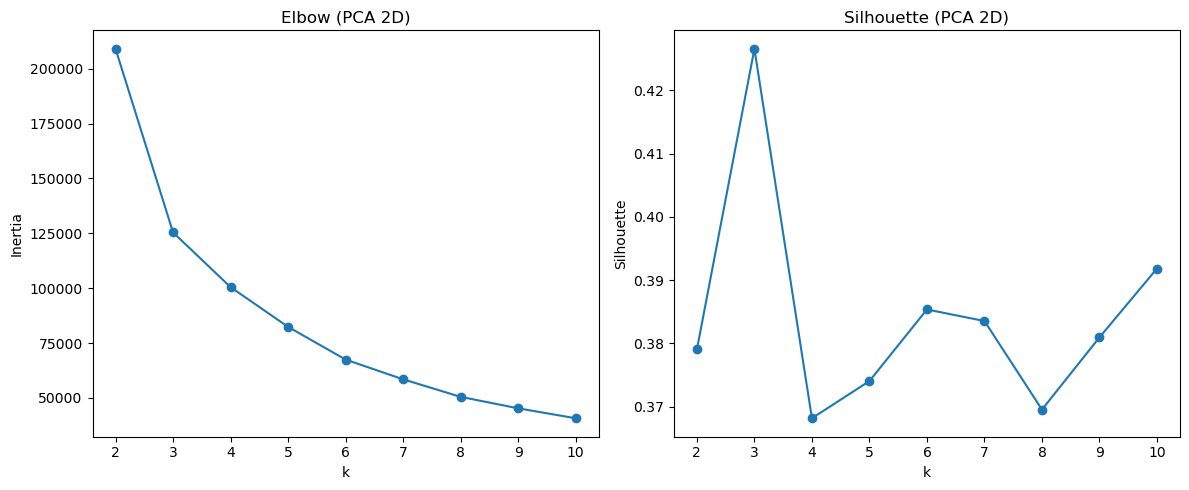

In [32]:
def evaluate_kmeans(X_embedded, max_k=10, random_state=42):
    inertias = []
    silhouettes = []
    K_range = range(2, max_k+1)
    for k in K_range:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = km.fit_predict(X_embedded)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X_embedded, labels))
    return K_range, inertias, silhouettes


K_range, inertias_pca, silhouettes_pca = evaluate_kmeans(X_pca_2, max_k=10)
_, inertias_kpca_rbf, silhouettes_kpca_rbf = evaluate_kmeans(X_kpca_rbf, max_k=10)
_, inertias_mds, silhouettes_mds = evaluate_kmeans(X_mds, max_k=10)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertias_pca, 'o-'); plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow (PCA 2D)')
plt.subplot(1,2,2)
plt.plot(K_range, silhouettes_pca, 'o-'); plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Silhouette (PCA 2D)')
plt.tight_layout()
plt.show()

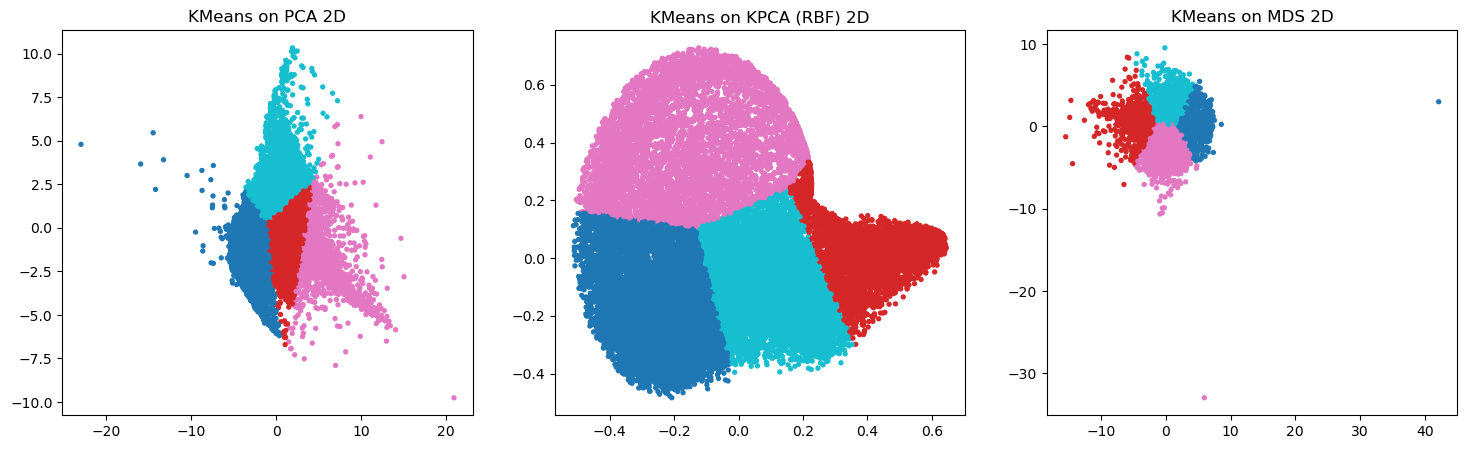

In [33]:
k_selected = 4
km_pca = KMeans(n_clusters=k_selected, random_state=42, n_init=20).fit(X_pca_2)
labels_pca = km_pca.labels_

km_kpca_rbf = KMeans(n_clusters=k_selected, random_state=42, n_init=20).fit(X_kpca_rbf)
labels_kpca_rbf = km_kpca_rbf.labels_

km_mds = KMeans(n_clusters=k_selected, random_state=42, n_init=20).fit(X_mds)
labels_mds = km_mds.labels_


fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].scatter(X_pca_2[:,0], X_pca_2[:,1], c=labels_pca, s=8, cmap='tab10'); axes[0].set_title('KMeans on PCA 2D')
axes[1].scatter(X_kpca_rbf[:,0], X_kpca_rbf[:,1], c=labels_kpca_rbf, s=8, cmap='tab10'); axes[1].set_title('KMeans on KPCA (RBF) 2D')
axes[2].scatter(X_mds[:,0], X_mds[:,1], c=labels_mds, s=8, cmap='tab10'); axes[2].set_title('KMeans on MDS 2D')
plt.show()

In [34]:
db_default = DBSCAN(eps=0.5, min_samples=5)
labels_db_pca = db_default.fit_predict(X_pca_2)
print("DBSCAN on PCA2 - clusters (including -1 for noise):", len(set(labels_db_pca)))


def dbscan_grid_search(X_emb, eps_values=[0.2,0.4,0.6,0.8,1.0], min_samples_values=[3,5,8]):
    results = []
    for eps in eps_values:
        for ms in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=ms).fit(X_emb)
            labels = db.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                sil = silhouette_score(X_emb, labels) if len(set(labels))>1 else -1
            else:
                sil = -1
            results.append({'eps':eps, 'min_samples':ms, 'n_clusters':n_clusters, 'silhouette':sil})
    return pd.DataFrame(results)

db_results = dbscan_grid_search(X_kpca_rbf, eps_values=[0.2,0.4,0.6,0.8,1.0,1.5], min_samples_values=[3,5,8,12])
db_results.sort_values(by='silhouette', ascending=False).head(10)

DBSCAN on PCA2 - clusters (including -1 for noise): 7


,eps,min_samples,n_clusters,silhouette
0,0.2,3,1,-1
1,0.2,5,1,-1
22,1.5,8,1,-1
21,1.5,5,1,-1
20,1.5,3,1,-1
19,1.0,12,1,-1
18,1.0,8,1,-1
17,1.0,5,1,-1
16,1.0,3,1,-1
15,0.8,12,1,-1


In [35]:
def clustering_metrics(X_emb, labels):
   
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    if n_clusters <= 1:
        return {'n_clusters': n_clusters, 'silhouette': np.nan, 'db_index': np.nan}
    else:
        sil = silhouette_score(X_emb, labels)
        db = davies_bouldin_score(X_emb, labels)
        return {'n_clusters': n_clusters, 'silhouette': sil, 'db_index': db}

metrics = {}
metrics['PCA-KMeans'] = clustering_metrics(X_pca_2, labels_pca)
metrics['KPCA(RBF)-KMeans'] = clustering_metrics(X_kpca_rbf, labels_kpca_rbf)
metrics['MDS-KMeans'] = clustering_metrics(X_mds, labels_mds)
metrics['PCA-DBSCAN'] = clustering_metrics(X_pca_2, labels_db_pca)

pd.DataFrame(metrics).T

,n_clusters,silhouette,db_index
PCA-KMeans,4.0,0.368169,0.871505
KPCA(RBF)-KMeans,4.0,0.405017,0.816193
MDS-KMeans,4.0,0.372783,0.855322
PCA-DBSCAN,6.0,0.329635,1.810805


In [47]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

arit = adjusted_rand_score(y.iloc[:len(labels_pca)], labels_pca)
ami = adjusted_mutual_info_score(y.iloc[:len(labels_pca)], labels_pca)
print("PCA-KMeans ARI:", arit, "AMI:", ami)

arit_k = adjusted_rand_score(y.iloc[:len(labels_kpca_rbf)], labels_kpca_rbf)
print("KPCA-KMeans ARI:", arit_k)

PCA-KMeans ARI: 0.0001395259180618777 AMI: 0.00039737437487208014
KPCA-KMeans ARI: -0.0010327046093705334


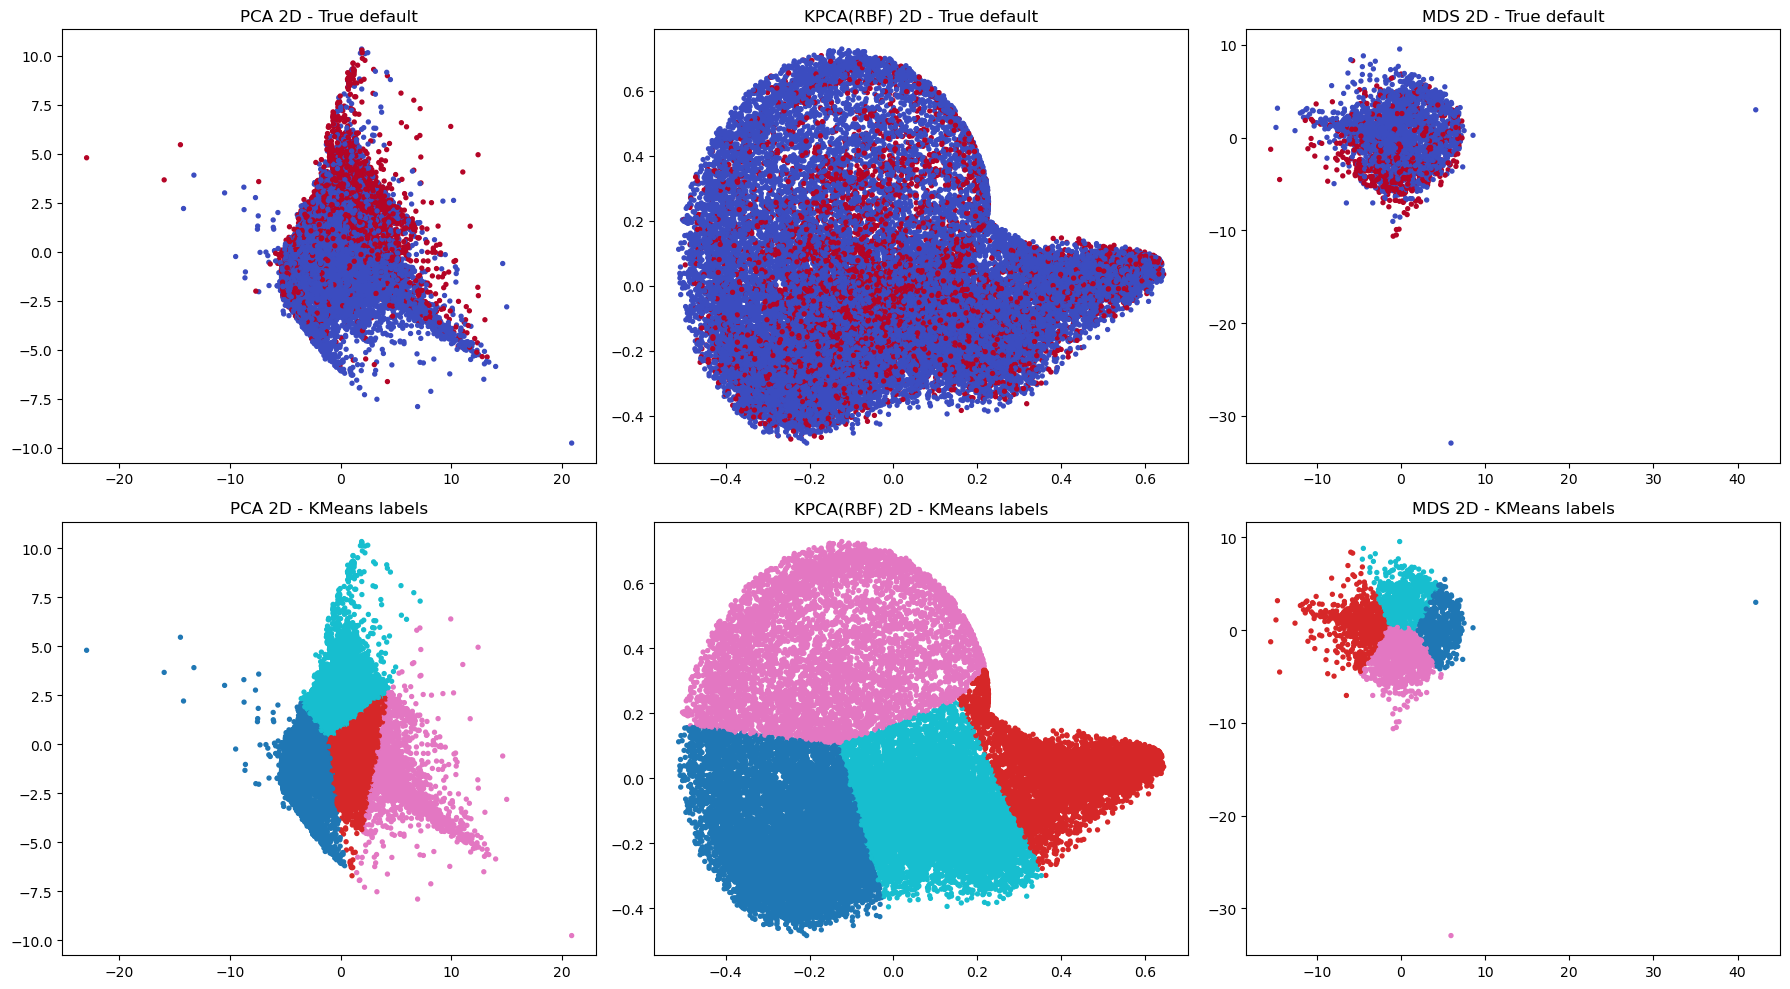

In [39]:
fig, axes = plt.subplots(2,3, figsize=(18,10))


axes[0,0].scatter(X_pca_2[:,0], X_pca_2[:,1], c=y_clean, s=8, cmap='coolwarm'); axes[0,0].set_title('PCA 2D - True default')
axes[0,1].scatter(X_kpca_rbf[:,0], X_kpca_rbf[:,1], c=y_clean, s=8, cmap='coolwarm'); axes[0,1].set_title('KPCA(RBF) 2D - True default')
axes[0,2].scatter(X_mds[:,0], X_mds[:,1], c=y_for_mds, s=8, cmap='coolwarm'); axes[0,2].set_title('MDS 2D - True default')


axes[1,0].scatter(X_pca_2[:,0], X_pca_2[:,1], c=labels_pca, s=8, cmap='tab10'); axes[1,0].set_title('PCA 2D - KMeans labels')
axes[1,1].scatter(X_kpca_rbf[:,0], X_kpca_rbf[:,1], c=labels_kpca_rbf, s=8, cmap='tab10'); axes[1,1].set_title('KPCA(RBF) 2D - KMeans labels')
axes[1,2].scatter(X_mds[:,0], X_mds[:,1], c=labels_mds, s=8, cmap='tab10'); axes[1,2].set_title('MDS 2D - KMeans labels')

plt.tight_layout()
plt.show()

In [43]:
cluster_ids = labels_kpca_rbf  
cluster_profile = pd.DataFrame(X).copy()
cluster_profile['cluster'] = cluster_ids
profile = cluster_profile.groupby('cluster').mean().T
profile.head()


feature_variances = profile.var(axis=1).sort_values(ascending=False)
feature_variances.head(10)

BILL_AMT6    3.137657e+08
BILL_AMT1    1.999068e+08
BILL_AMT4    1.660689e+08
BILL_AMT3    1.514716e+08
BILL_AMT5    9.456491e+07
BILL_AMT2    9.357003e+07
LIMIT_BAL    1.265041e+02
PAY_AMT1     3.801911e+01
PAY_AMT2     3.576660e+01
PAY_AMT3     2.981678e+01
dtype: float64

In [52]:
embedding_used = X_pca_2       

# ✅ Choose your clustering algorithm output
# (Replace with db.labels_ if you used DBSCAN instead of KMeans)
labels_used = km_pca.labels_

# ✅ Select appropriate y (target)
if 'y_for_mds' in locals():
    y_used = y_for_mds.reset_index(drop=True)
else:
    y_used = y_clean.reset_index(drop=True)

# ✅ Make sure all arrays match in length
min_len = min(embedding_used.shape[0], len(labels_used), len(y_used))

# ✅ Build the results DataFrame
results = pd.DataFrame({
    'Dim1': embedding_used[:min_len, 0],
    'Dim2': embedding_used[:min_len, 1],
    'Cluster': labels_used[:min_len],
    'Default': y_used.iloc[:min_len].values
})

print(f"✅ Results DataFrame created successfully: {results.shape}")
display(results.head())

✅ Results DataFrame created successfully: (3000, 4)


,Dim1,Dim2,Cluster,Default
0,-3.457521,2.015434,0,0
1,-1.005060,2.136679,3,0
2,-0.281459,0.817139,3,0
3,0.273060,0.730761,1,1
4,0.134512,-0.329693,1,1


In [53]:
cluster_default_table = pd.crosstab(results['Cluster'], results['Default'], normalize='index') * 100
cluster_default_table.columns = ['Non-Default (%)', 'Default (%)']
display(cluster_default_table.sort_values('Default (%)', ascending=False))

,Non-Default (%),Default (%)
Cluster,,
1,75.296912,24.703088
2,78.618421,21.381579
3,79.553073,20.446927
0,79.874870,20.125130


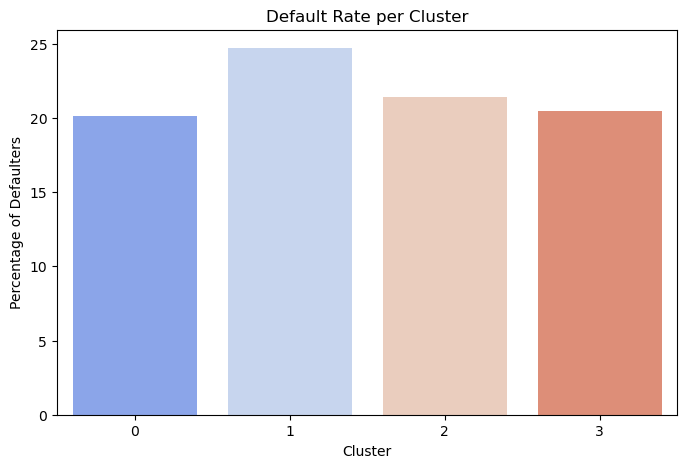

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x=cluster_default_table.index, y=cluster_default_table['Default (%)'], palette='coolwarm')
plt.title("Default Rate per Cluster")
plt.ylabel("Percentage of Defaulters")
plt.xlabel("Cluster")
plt.show()

In [55]:
cluster_summary = X_clean.copy()
cluster_summary['Cluster'] = results['Cluster']


cluster_summary['Default'] = y_clean.values[:len(cluster_summary)]

summary_stats = cluster_summary.groupby('Cluster')[['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'Default']].mean()
display(summary_stats)

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,Default
Cluster,,,,,
0.0,88.725835,36.041710,-0.641293,2385.864277,0.208551
1.0,87.434076,35.701900,-0.049881,16364.279138,0.118765
2.0,102.605483,36.990132,0.335526,49113.103835,0.240132
3.0,64.310479,33.683799,0.646927,7901.872138,0.328492
